# Heart Disease Analysis

This dataset is from the <a href = "https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a>, courtesy of: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

This dataset measures the presence of heart disease in 303 patients and was donated in 1988. The original study had 76 attributes, but this experiment will use a subset of 14. The following attributes are:

 * age : the age of the patient  
 * sex : the sex of the patient  
     * 1 : male
     * 0 : female
 * cp : chest pain type 
     * 1 : typical angina
     * 2 : atypical angina
     * 3 : non-anginal pain
     * 4 : asymptomatic
 * trestbps : resting blood pressure (in mm Hg on admission to the hospital) 
 * chol : serum cholestoral in mg/dl 
 * fbs : (fasting blood sugar > 120 mg/dl)
     * 1 : true
     * 0 : false
 * restecg: resting electrocardiographic results
     * 0 : normal
     * 1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * 2 : showing probable or definite left ventricular hypertrophy by Estes' criteria 
 * thalach : maximum heart rate achieved  
 * exang: exercise induced angina
     * 1 : yes
     * 0 : no
 * oldpeak : ST depression induced by exercise relative to rest
 * slope : the slope of the peak exercise ST segment
     * 1 : upsloping
     * 2 : flat
     * 3 : downsloping 
 * ca : number of major vessels (0-3) colored by flourosopy 
 * thal : a blood disorder called thalassemia
     * 3 : fixed defect (no blood flow in some part of the heart)
     * 6 : normal blood flow
     * 7 : reversible defect (a blood flow is observed but it is not normal)
 * target : heart disease present
     * 1 : yes
     * 0 : no

## First Analysis

In [10]:
# ol' reliable
import pandas as pd
import numpy as np

In [11]:
heart = pd.read_csv('finished_cleveland.csv')

In [12]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [13]:
# summary statistics
round(heart.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.44,9.04,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.16,0.96,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.69,17.60,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.69,51.78,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.99,0.99,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.61,22.88,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


In [14]:
# checking for numerical outliers
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [15]:
heart.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


even though most of our data types are integers, we have a lot of categorical variables.


| categorical attributes | continuous attributes | target attribute |
| :- | :- | :- |
 | sex  | age | num |
 | cp  | trestbps |
 | fbs  | chol |
 | restecg   |thalach |
 | exang  |oldpeak |
 | slope  
 | ca  
 | thal  

In [16]:
con_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

If we look at the unique values for each categorical attribute, we see some '?'s in our ca and thal attributes, which are both stored as objects.

In [17]:
for x in cat_cols:
    print(f'{x} has values {heart[x].unique()}')

sex has values [1 0]
cp has values [1 4 3 2]
fbs has values [1 0]
restecg has values [2 0 1]
exang has values [0 1]
slope has values [3 2 1]
ca has values ['0' '3' '2' '1' '?']
thal has values ['6' '3' '7' '?']


In [18]:
heart[heart.ca == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [19]:
heart[heart.thal == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


We should remove them. There's only 6 of missing values, and I'm not sure what else to do with them.

In [20]:
# dropping rows
print(heart.shape[0])
heart.drop([166, 192, 287, 302, 87, 266], inplace = True)
print(heart.shape[0])

303
297


In [21]:
for x in cat_cols:
    print(f'{x} has values {heart[x].unique()}')

sex has values [1 0]
cp has values [1 4 3 2]
fbs has values [1 0]
restecg has values [2 0 1]
exang has values [0 1]
slope has values [3 2 1]
ca has values ['0' '3' '2' '1']
thal has values ['6' '3' '7']


In [22]:
heart.num.value_counts(normalize = True)

0    0.538721
1    0.181818
2    0.117845
3    0.117845
4    0.043771
Name: num, dtype: float64

According to the website source, 'Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).' For the sake of simplifying our work, we will also do this. Lets also convert our categorical attributes into the object type.

In [23]:
# reassigning data type for categorical variables
heart = heart.astype({'sex' : 'object', 'cp' : 'object', 'fbs' : 'object', 'restecg' : 'object',
                      'exang' : 'object', 'slope' : 'object', 'num' : 'bool'}) 

In [24]:
heart.rename(columns = {'num': 'disease'}, inplace=True)

In [25]:
heart.disease.value_counts(normalize = True)

False    0.538721
True     0.461279
Name: disease, dtype: float64

Our target is pretty evenly distributed, so we shouldn't worry about sampling issues.

In [26]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    object 
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  disease   297 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 32.8+ KB


Now, all of our attributes are the correct data type, and our target attribute is correctly stored and labeled. Let's visualize our data.

## Visualizations

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

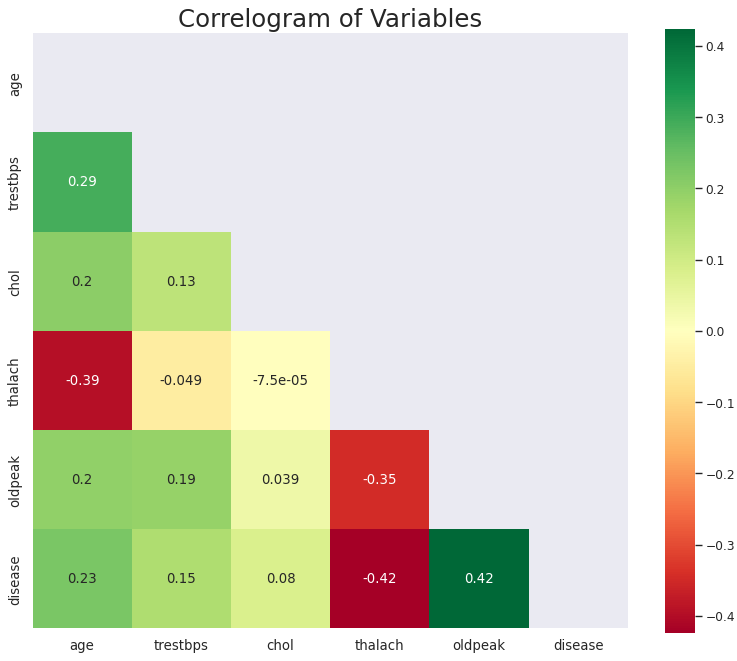

In [28]:
# creating correlation matrix
corr = heart.corr()
matrix = np.triu(np.ones_like(corr))

with sns.axes_style('white'):
    sns.set(rc = {"figure.figsize":(12, 10)})
    plt.figure(figsize = (12,10), dpi = 80)
    sns.heatmap(corr, 
                mask = matrix,
                cmap = 'RdYlGn',
                center = 0, 
                annot = True,
                square = True)

plt.title('Correlogram of Variables', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Here are the correlations of the continuous attributes. The strongest correlation in between attributes is only -0.39, so we shouldn't be too concerned with colinearity. It appears that thalach, the maximum heart rate achieved during exercise, and oldpeak, the ST depression caused by exercise, are the most correlated to the presence of heart disease. I'm surprised that cholesteral levels has the weakeset correlation with a value of 0.08.

Now, we can visualize the distributions of each attribute by the presence of heart disease.

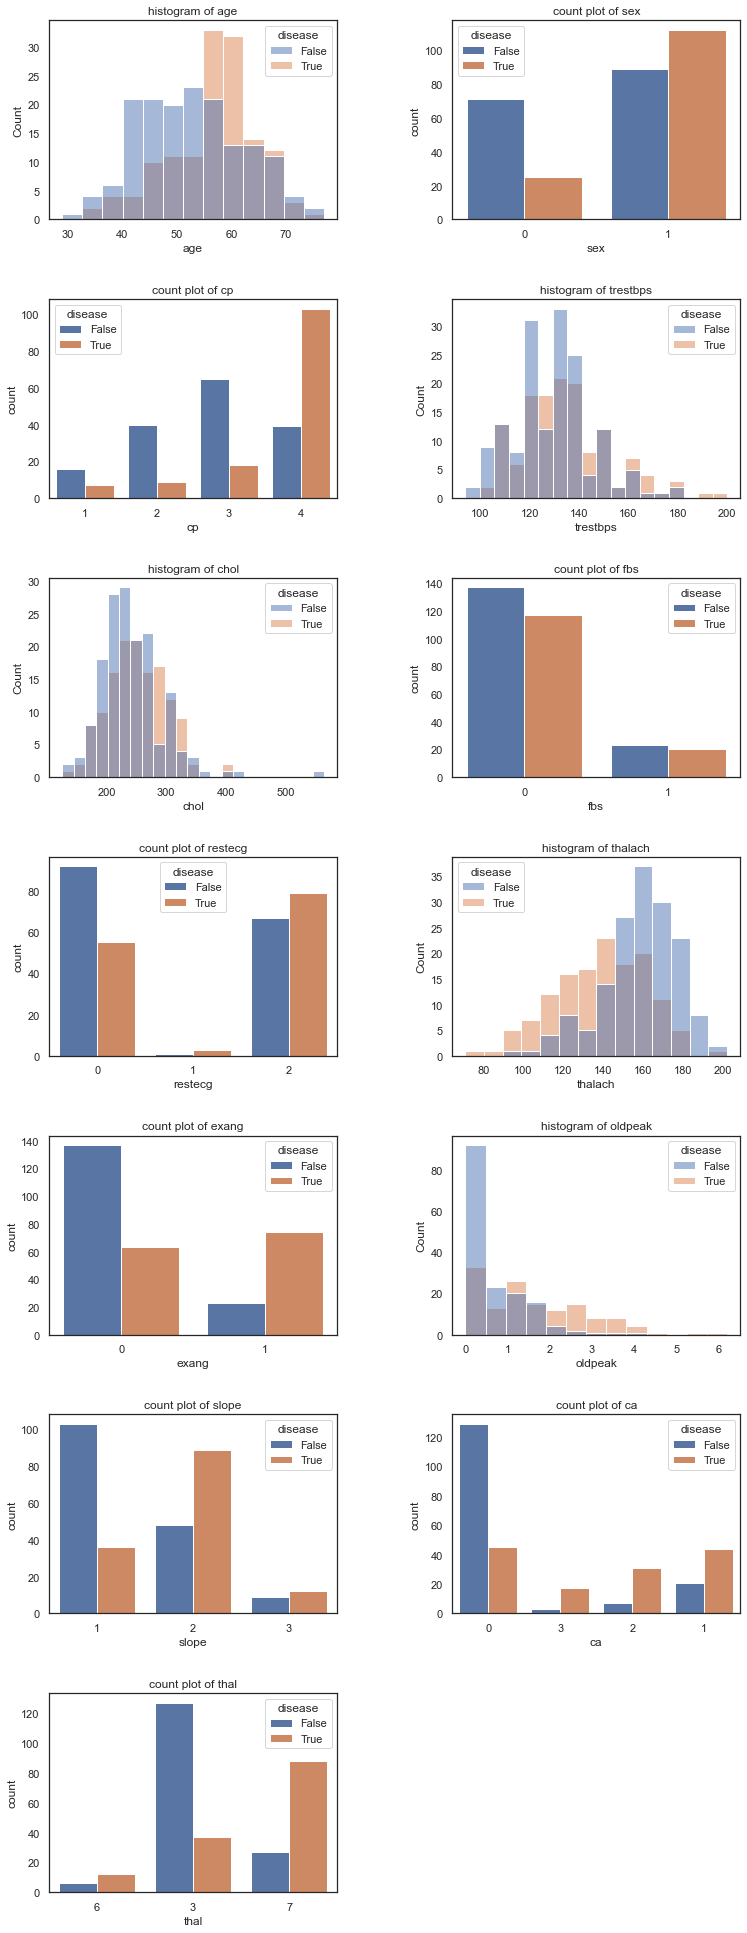

In [29]:
sns.set(rc = {'figure.figsize' : (12, 20)})
sns.set_style('white')

# if its a continuous attribute, graph a histogram
# if its a categorical attribute, graph a countplot
for i in range(1, 14):
    plt.subplot(7, 2, i)
    if heart.iloc[:, i - 1].dtype in ['int64', 'float64']:
        sns.histplot(data = heart, 
                    x = heart.columns[i - 1], 
                    hue = 'disease').set(title = f'histogram of {heart.columns[i - 1]}')
    else:
        sns.countplot(data = heart,
                      x = heart.columns[i - 1],
                      hue = 'disease').set(title = f'count plot of {heart.columns[i - 1]}')
    
plt.subplots_adjust(left = 0.2,
                    bottom = 0.2, 
                    right = 1, 
                    top = 1.5, 
                    wspace = 0.4, 
                    hspace = 0.4)
plt.show()

Some key differences:
 * patients with asymptomatic chest pain are more likely to experience heart disease (I'm kinda surprised at this . . . oh well)
 * patients with heart disease recorded lower heart rates achieved during exercise.
 * the absence of exercise-induced angina is a very strong indicator of a healthy heart.
 * the more arteries colored by flouroscopy, the higher the risk for heart disease. a colored artery means that cholesteral buildup is present.
 * a thal value of 3, or normal heart flow, is a solid indicator of no heart disease. A 7, however, indicates an abmormal defect, and is more common in patients with heart disease. 

And for the next step: chefs call it *Mise en place*, we call it data preparation.

## Dataset Preparation

In [30]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,True
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,False


In [31]:
X = heart.iloc[:, : -1]
y = heart.iloc[:, -1]

# one-hot-vector encoding for the categorical attributes
X = pd.get_dummies(data = X, columns = cat_cols) #drop_first = True)

In [32]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# normalizing the variables. I chose to use a standard scale.
X_train.iloc[:, :5] = sc.fit_transform(X_train[con_cols])
X_test.iloc[:, :5] = sc.fit_transform(X_test[con_cols])

c:\Users\rswil\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\rswil\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [34]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
15,0.284590,0.996310,-1.593549,1.109935,0.471773,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
272,-0.912065,0.448455,1.352500,-1.221038,0.639908,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
183,0.502164,2.530304,0.507828,-0.141884,2.657535,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
278,0.284590,1.215452,-0.275038,0.678273,-0.873312,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
226,-0.803278,-1.085539,-0.851886,-0.228216,-0.789244,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.372459,-0.373327,0.178201,0.635107,-0.705176,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
255,-1.347213,-0.647255,-0.748877,1.066769,-0.873312,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
89,-0.368131,-0.099400,0.219404,0.030781,-0.452973,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
43,0.502164,0.996310,-0.687072,0.376110,0.471773,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


## Fitting the Models

In [35]:
# importing . . .
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# preparing classifiers . . .
classifiers = [XGBClassifier(n_jobs = 4, random_state = 32), 
               RandomForestClassifier(random_state = 32), 
               GradientBoostingClassifier(random_state = 32), 
               DecisionTreeClassifier(random_state = 32), 
               LogisticRegression(random_state = 32),
               RidgeClassifier(random_state = 32)]

In [36]:
from sklearn.metrics import accuracy_score, f1_score

# function to test multiple classifiers
# returns their accuracy
def test_classifiers(train_data, train_classes, test_data, test_classes, classifiers):
    res = {}
    for clf in classifiers:
        
        name = clf.__class__.__name__
        clf.fit(train_data, train_classes)
        
        acc = round(accuracy_score(test_classes, clf.predict(test_data)), 3)
        f1 = round(f1_score(y_true = test_classes,
                            y_pred = clf.predict(test_data), 
                            average = 'weighted'), 3)


        print(f'{name} trained with an F1 score of {f1} and an accuracy of {acc}')
        print(' ')

        res[name] = (f1, acc)

    return res

In [37]:
classifier_results = test_classifiers(X_train, y_train, X_test, y_test, classifiers)

XGBClassifier trained with an F1 score of 0.831 and an accuracy of 0.833
 
RandomForestClassifier trained with an F1 score of 0.831 and an accuracy of 0.833
 
GradientBoostingClassifier trained with an F1 score of 0.867 and an accuracy of 0.867
 
DecisionTreeClassifier trained with an F1 score of 0.767 and an accuracy of 0.767
 
LogisticRegression trained with an F1 score of 0.932 and an accuracy of 0.933
 
RidgeClassifier trained with an F1 score of 0.932 and an accuracy of 0.933
 


In [38]:
from sklearn.metrics import confusion_matrix

# function that creates confusion matrices for each classifier
def matrices(train_data, train_classes, test_data, test_classes, classifiers):
    i = 1
    for clf in classifiers:
        
        name = clf.__class__.__name__
        clf.fit(train_data, train_classes)
        
        # creating confusion matrix
        cm = confusion_matrix(test_classes, clf.predict(test_data))
        
        plt.subplot(2, 3, i)
        sns.heatmap(cm, annot = True, cmap = 'coolwarm')
        plt.xlabel('predicted label')
        plt.ylabel('true label')
        plt.title(f'{name} cm')
  
        i += 1
    
    plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 1.0)
    plt.show()

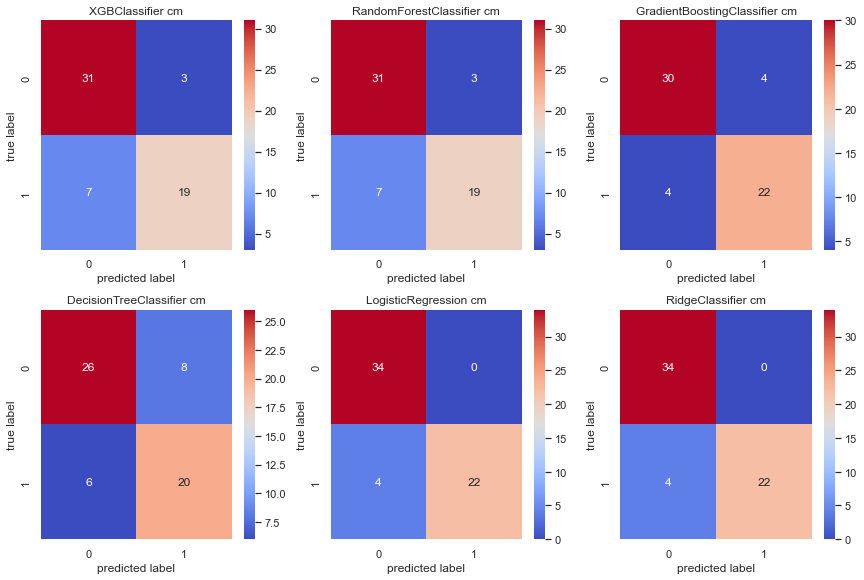

In [73]:
sns.set(rc = {"figure.figsize":(12, 8)})
matrices(X_train, y_train, X_test, y_test, classifiers)


As we can see, the logistic regression and ridge classifier had the highest accuracy and F1 scores. Because the ridge classifier is a variation of the logistic regression model and our data isn't too varied, it makes sense that they would perform so similarly. We can visualize the ROC curve for more insights.

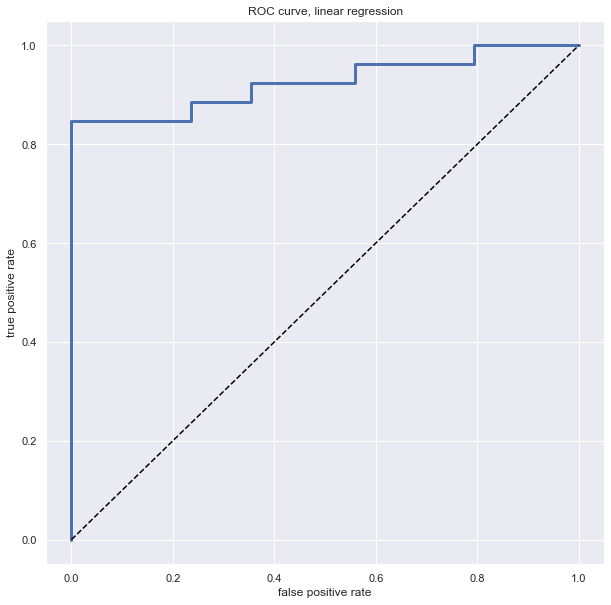

In [76]:
import sklearn.metrics as metrics

sns.set(rc = {'figure.figsize' : (10, 10)})

# fitting
best_clf = LogisticRegression(random_state = 32)
best_clf.fit(X_train, y_train)

# probabilities for ROC curve
y_pred_proba = best_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# plotting
plt.plot(fpr, tpr, linewidth = 3)
plt.plot([0,1], [0,1], linestyle = 'dashed', color = 'black')

plt.title('ROC curve, linear regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, best_clf.predict(X_test))

0.9230769230769231

In [75]:
best_clf.best_estimator_

LogisticRegression(C=0.4444444444444444, penalty='l1', solver='liblinear')

Here is the ROC curve. The area under the ROC curve is 0.923, and hugs the top left pretty well. We can see that our model is more specific than sensitive, because our logistic regression and ridge classifiers correctly labeled all patients without heart disease, but incorrectly labeled 4 patients with heart disease. 

Note : There is not much room for optimizing this model. There were only 4 incorrectly labled patients, and the test size is already very small. I am content with these parameters:
 * C = 0.44
    *  with C < 1.0, our model has less regularization. This makes sense because our training size was not that large.
 * penalty = 'l1'
    * with a smaller C value and a more constrained model, a 'l1' penalty gives us sparser decisions
* solver = 'liblienar'
    * because we have such a small dataset, this solver is efficient to use


In [42]:
# table of each attribute in our finalized classifier, along with its odds ratio
print('intercept: ', best_clf.intercept_[0])
print('classes: ', best_clf.classes_)
pd.DataFrame({'coeff' : best_clf.coef_[0], 
              'odds ratio' : np.exp(best_clf.coef_[0])},
             index = X_train.columns).sort_values(by = 'odds ratio', ascending = False)

intercept:  0.046280848102120575
classes:  [False  True]


,coeff,odds ratio
cp_4,0.993572,2.700865
thal_7,0.838322,2.312484
sex_1,0.691634,1.996977
ca_2,0.690504,1.994721
slope_2,0.529152,1.697492
ca_3,0.392932,1.481318
oldpeak,0.356286,1.428015
exang_1,0.350588,1.419902
ca_1,0.342855,1.408964
trestbps,0.332707,1.394738


This table shows the attributes used in the final logistic regression model and their cooresponding coefficients. The second column shows the odds ratio. For example, 'cp_4', or the presence of asymptomatic chest pain, has a coefficientof 0.993, or a $e^{0.993} = $  2.7% increase in the probability of heart disease. The table is also sorted by the odds ratio in descending order.

Patients with asymptomatic chest pain, abnormal blood flow, and at least 2 vessels colored by flouroscopy were most likely to be labeled with heart disease by our linear regression and ridge classifier models.

Our findings are very similar to those of the Center for Disease Control, which lists high blood pressure and high cholesterol levels as being the most common causes of heart disease. Interestingly, smoking is also a factor. It would be interesting if our dataset had included that attribute. 